In [1]:
#import everything here
import numpy as np
import pandas as pd
import lmfit

In [8]:
#load the data here
a = pd.read_csv('/home/ade/Documents/Research/170723002601253a.csv') #30_200 n = 203
a

,Unnamed: 0,w_obj,f_obj,e_obj,f_mean,f_stddev
0,0,5651.809902,1.020033,0.080839,0.997096,0.016833
1,1,5651.864594,1.046876,0.079126,0.997601,0.015559
2,2,5651.919287,1.072260,0.077609,0.997895,0.016374
3,3,5651.973980,1.048988,0.079016,0.997315,0.016973
4,4,5652.028672,0.995554,0.082279,0.995801,0.016732
...,...,...,...,...,...,...
3989,3989,5869.978713,0.998854,0.116081,1.000146,0.020302
3990,3990,5870.033406,1.021658,0.113251,1.002827,0.027337
3991,3991,5870.088098,1.032947,0.112790,1.001576,0.023502
3992,3992,5870.142791,1.005990,0.115304,0.997363,0.018769


In [23]:
#objective function

def continuum(y_obj, y_model):
    y_model = y_model * a
    return y_obj - y_model

def residual(pars, y_obj, y_model):
    """Model a decaying sine wave and subtract data."""
    vals = pars.valuesdict()
    const = vals['const']
    return y_obj - (const*y_model)

In [25]:
fit_params = Parameters()
fit_params.add('const', value=1.0)
out = minimize(residual, fit_params, args=(a['f_obj'], a['f_mean']))

print(fit_report(out))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 3994
    # variables        = 1
    chi-square         = 13.9877060
    reduced chi-square = 0.00350306
    Akaike info crit   = -22581.5526
    Bayesian info crit = -22575.2601
[[Variables]]
    const:  0.99502094 +/- 9.5274e-04 (0.10%) (init = 1)


(0.0, 1.5)

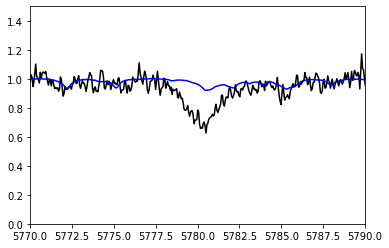

In [28]:
import matplotlib.pyplot as plt
plt.plot(a.w_obj, a.f_obj, 'k-')
plt.plot(a.w_obj, a.f_mean, 'b-')
plt.xlim(5770, 5790)
plt.ylim(0, 1.5)

(0.0, 1.5)

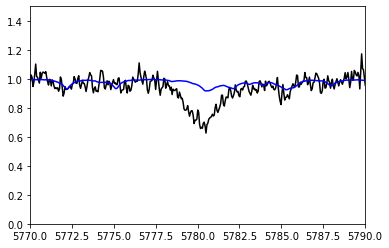

In [29]:
import matplotlib.pyplot as plt
plt.plot(a.w_obj, a.f_obj, 'k-')
plt.plot(a.w_obj, a.f_mean*0.99502094, 'b-')
plt.xlim(5770, 5790)
plt.ylim(0, 1.5)

In [22]:
from numpy import exp, linspace, pi, random, sign, sin

from lmfit import Parameters, fit_report, minimize

p_true = Parameters()
p_true.add('amp', value=14.0)
p_true.add('period', value=5.46)
p_true.add('shift', value=0.123)
p_true.add('decay', value=0.032)


def residual(pars, x, data=None):
    """Model a decaying sine wave and subtract data."""
    vals = pars.valuesdict()
    amp = vals['amp']
    per = vals['period']
    shift = vals['shift']
    decay = vals['decay']

    if abs(shift) > pi/2:
        shift = shift - sign(shift)*pi
    model = amp * sin(shift + x/per) * exp(-x*x*decay*decay)
    if data is None:
        return model
    return model - data


random.seed(0)
x = linspace(0.0, 250., 1001)
noise = random.normal(scale=0.7215, size=x.size)
data = residual(p_true, x) + noise

fit_params = Parameters()
fit_params.add('amp', value=13.0)
fit_params.add('period', value=2)
fit_params.add('shift', value=0.0)
fit_params.add('decay', value=0.02)

out = minimize(residual, fit_params, args=(x,), kws={'data': data})

print(fit_report(out))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 1001
    # variables        = 4
    chi-square         = 498.811759
    reduced chi-square = 0.50031270
    Akaike info crit   = -689.222517
    Bayesian info crit = -669.587497
[[Variables]]
    amp:     13.9121945 +/- 0.14120288 (1.01%) (init = 13)
    period:  5.48507045 +/- 0.02666493 (0.49%) (init = 2)
    shift:   0.16203677 +/- 0.01405661 (8.67%) (init = 0)
    decay:   0.03264538 +/- 3.8014e-04 (1.16%) (init = 0.02)
[[Correlations]] (unreported correlations are < 0.100)
    C(period, shift) =  0.797
    C(amp, decay)    =  0.582
    C(amp, shift)    = -0.297
    C(amp, period)   = -0.243
    C(shift, decay)  = -0.182
    C(period, decay) = -0.150


In [17]:
print(lmfit.__version__)

1.0.2
